# Introduction to SciPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import scipy

## Linear algebra

In [2]:
import scipy.linalg

### Matrix inverse

In [3]:
### Matrix Inverse ###

A = np.array([[1, 2], [3, 4]])
A_inv = scipy.linalg.inv(A)

### Error
np.sum(
    np.abs(A.dot(A_inv) - np.identity(2))
)

1.3322676295501878e-15

### Solving linear system

$A x = b$

$x^* = A^{-1} b$

In [4]:
### A x = b ###

A = np.array([[1, 2], [3, 4]])
b = np.array([1, 3])

x = scipy.linalg.inv(A).dot(b)

### Error

np.sum(np.abs(A.dot(x) - b))

4.4408920985006262e-16

### Pseudo-inverse and least squares

In [5]:
import scipy.special

xs = np.linspace(0, 1, 50)
signal = scipy.special.jv(0.0, xs * 20)
ys = signal + np.random.standard_normal(size=xs.shape[0]) * 0.1

/home/mborisyak/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


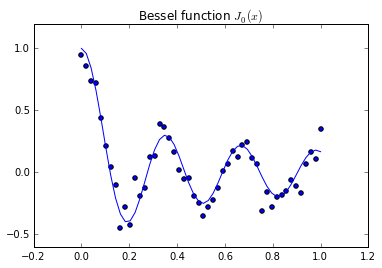

In [6]:
plt.scatter(xs, ys)
plt.plot(xs, signal)
plt.title("Bessel function $J_0(x)$")

Using cos-basis we can approximate data:

$A_{ij} = f_j(x_i) $

where:

$f_j(x) = \cos(j x)$

The solution is well know least square regression:
```
scipy.linalg.lstsq
```

In [7]:
def approximate_cos_basis(xs, ys, k = 5):
    js = np.arange(k)
    A = np.cos(np.outer(xs, js))
    c, resid, rank, sigma = scipy.linalg.lstsq(A, ys)
    approximated = A.dot(c).T 
    return approximated

In [8]:
c = approximate_cos_basis(xs, ys)

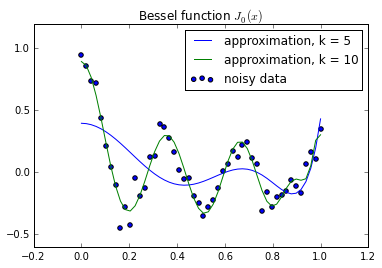

In [9]:
plt.scatter(xs, ys, label="noisy data")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 5), label="approximation, k = 5")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 10), label="approximation, k = 10")
plt.legend()
plt.title("Bessel function $J_0(x)$")

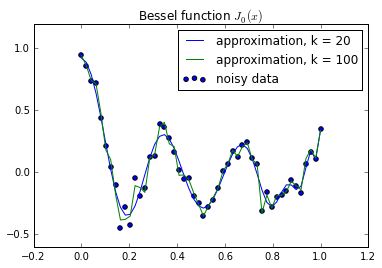

In [10]:
plt.scatter(xs, ys, label="noisy data")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 20), label="approximation, k = 20")
plt.plot(xs, approximate_cos_basis(xs, ys, k = 100), label="approximation, k = 100")
plt.legend()
plt.title("Bessel function $J_0(x)$")

### Matrix decomposition

In [11]:
import scipy.stats

m = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.7], [0.7, 1.0]])

data = scipy.stats.multivariate_normal(m, cov).rvs(size=500)
xs, ys = np.meshgrid(
    np.linspace(data[:, 0].min(), data[:, 0].max(), 100),
    np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
)

pdf = scipy.stats.multivariate_normal(m, cov).pdf(np.dstack([xs, ys]))

/home/mborisyak/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<matplotlib.contour.QuadContourSet instance at 0x7f3d474c5098>

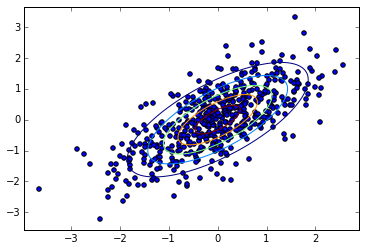

In [12]:
plt.scatter(data[:, 0], data[:, 1])
plt.contour(xs, ys, pdf, 5)

### PCA via Eigen-decomposition

In [13]:
l, V = scipy.linalg.eig(data.T.dot(data))
V

array([[-0.71429328, -0.69984649],
       [ 0.69984649, -0.71429328]])

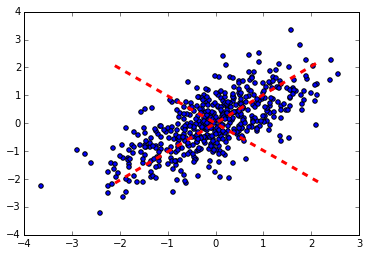

In [14]:
plt.scatter(data[:, 0], data[:, 1])
v = V * 3
plt.plot([-v[0, 0], v[0, 0]], [-v[1, 0], v[1, 0]], "--", color="red", linewidth=3)
plt.plot([-v[0, 1], v[0, 1]], [-v[1, 1], v[1, 1]], "--", color="red", linewidth=3)

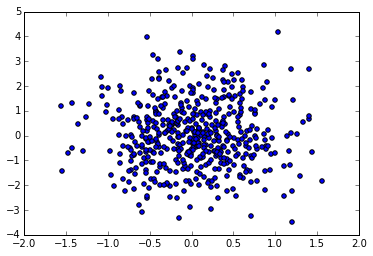

In [15]:
data_ = data.dot(V)

plt.scatter(data_[:, 0], data_[:, 1])

<matplotlib.contour.QuadContourSet instance at 0x7f3d44cdbcb0>

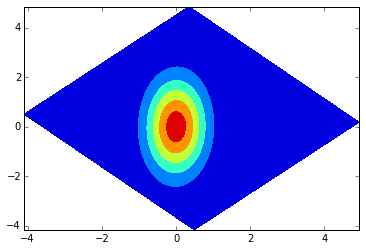

In [16]:
@np.vectorize
def rotate(x, y):
    r = np.array([x, y]).dot(V)
    return r[0], r[1]

xs_, ys_ = rotate(xs, ys)

plt.contourf(xs_, ys_, pdf, 5)

### PCA via SVD

In [17]:
U, s, Vh = scipy.linalg.svd(data)

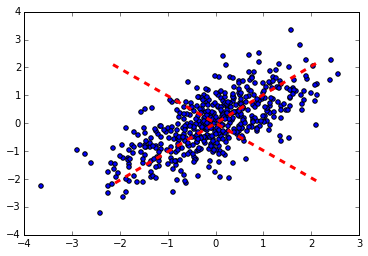

In [18]:
plt.scatter(data[:, 0], data[:, 1])
v = Vh * 3
plt.plot([-v[0, 0], v[0, 0]], [-v[1, 0], v[1, 0]], "--", color="red", linewidth=3)
plt.plot([-v[0, 1], v[0, 1]], [-v[1, 1], v[1, 1]], "--", color="red", linewidth=3)

## Optimization

In [19]:
import scipy.optimize

In [20]:
xs = np.random.gamma(shape=1.5, scale=0.8, size=150)

In [21]:
def neg_log_likelihood(params):
    from scipy.special import gamma
    shape, scale = params
    log_p = (shape - 1) * np.log(xs) - xs / scale - shape * np.log(scale) - np.log(gamma(shape)) 
    return -np.sum(log_p)

In [22]:
opt = scipy.optimize.minimize(neg_log_likelihood, x0=[1.0, 1.0], bounds=[(0.1, None), (0.1, None)], tol=1.0e-6)
opt.x

array([ 1.47113342,  0.86723943])

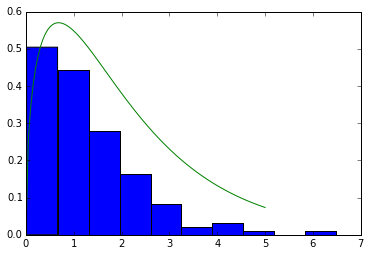

In [23]:
plt.hist(xs, bins=10, normed=True)
plt.plot(np.linspace(0, 5, 100), scipy.stats.gamma(opt.x[0], scale=opt.x[1]).pdf(np.linspace(0, 3, 100)))

## Sparse matrices

In [24]:
import scipy.sparse

m = scipy.stats.poisson(1.0).rvs(size=(100, 100))
m[m < 4]= 0

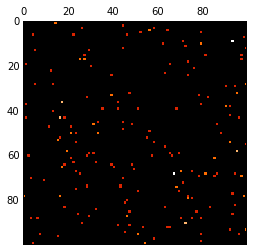

In [25]:
plt.matshow(m,cmap=plt.cm.gist_heat)

In [26]:
m_ = scipy.sparse.csc_matrix(m)
print m_

  (78, 0)	5
  (19, 1)	4
  (37, 1)	4
  (43, 1)	4
  (60, 2)	4
  (70, 3)	4
  (88, 3)	4
  (6, 4)	4
  (99, 4)	4
  (13, 5)	4
  (28, 5)	4
  (88, 6)	4
  (95, 7)	4
  (71, 9)	4
  (47, 11)	4
  (22, 12)	4
  (28, 13)	4
  (40, 13)	4
  (1, 14)	5
  (53, 15)	5
  (96, 15)	4
  (43, 16)	6
  (52, 16)	4
  (78, 16)	5
  (0, 17)	4
  :	:
  (29, 90)	4
  (38, 90)	5
  (38, 92)	4
  (42, 92)	4
  (54, 92)	5
  (93, 92)	4
  (9, 93)	7
  (77, 93)	4
  (86, 93)	4
  (29, 94)	4
  (68, 94)	4
  (82, 94)	4
  (32, 95)	5
  (58, 95)	6
  (43, 96)	4
  (95, 96)	4
  (15, 97)	4
  (17, 97)	4
  (69, 97)	5
  (7, 98)	4
  (78, 98)	5
  (12, 99)	4
  (28, 99)	5
  (55, 99)	4
  (93, 99)	5


## Statistics

#### Distributions

In [27]:
dist = scipy.stats.erlang(2.0)

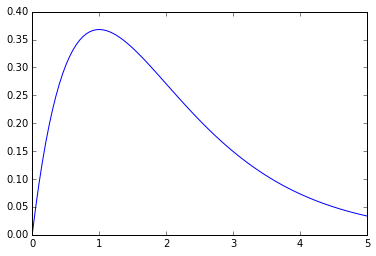

In [28]:
xs = np.linspace(0, 5, 100)
pdf = dist.pdf(xs)

plt.plot(xs, pdf)

In [29]:
samples = dist.rvs(size=100)

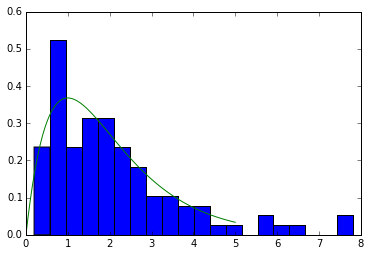

In [30]:
plt.hist(samples, bins=20, normed=True)
plt.plot(xs, pdf)

In [31]:
scipy.stats.kstest(samples, dist.cdf)

KstestResult(statistic=0.059061539305713229, pvalue=0.87645966907975537)

<Container object of 6 artists>

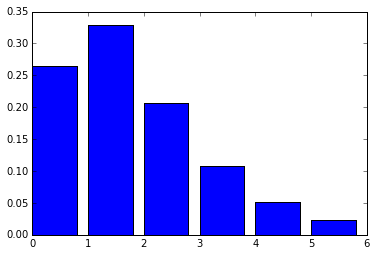

In [32]:
ps = dist.cdf(np.arange(1, 7)) - dist.cdf(np.arange(0, 6))
plt.bar(np.arange(0, 6), ps)

In [33]:
freq_, _ = np.histogram(samples, np.arange(0,7))
freq = freq_ / freq_.sum()

In [34]:
scipy.stats.chisquare(freq, ps)

Power_divergenceResult(statistic=0.98264873476333547, pvalue=0.96395309615378966)

# Excercises

- plot approximation error (vs true signal and vs data) depending on k (which k should be used given only noisy data?)
- make polynomial approximation
- load MNIST dataset
- find the best 2D linear subspace for MNIST dataset
- plot projected objects with labels
- plot pixel correlation matrix for some class
- *find the best hyper-plane for separation each class from the rest (advanced)*